## This is simple linear regression model with 2 data types
Table of contents
* Importing libraries
* Reading data
* Analise data
* Remove empty rows
* Remove ouliers
* Calculating linear regression function
* Visualising function and points
* R^2 value evaluation

### Importing necessary libraries

In [2]:
%matplotlib inline
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['figure.figsize'] = (20.0, 10.0)

### Reading data

In [3]:
# reading data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()
print(data)

(237, 4)
     Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
..      ...        ...              ...                  ...
232       2          2             3214                 1110
233       2          2             3394                 1215
234       2          2             3233                 1104
235       2          2             3352                 1170
236       2          2             3391                 1120

[237 rows x 4 columns]


There are 237 rows and 4 columns but we only observe Head size and Brian weight
### Analise data

In [4]:
data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [5]:
data.corr()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
Gender,1.000000,-0.088652,-0.514050,-0.465266
Age Range,-0.088652,1.000000,-0.105428,-0.169438
Head Size(cm^3),-0.514050,-0.105428,1.000000,0.799570
Brain Weight(grams),-0.465266,-0.169438,0.799570,1.000000


We will analise last 2 colums.
* Head Size(cm^3) column values are between 2720 and 4747 while mean value is 3633. Max and min values are not far from mean value
* Brain Weight(grams) values are between 955 and 1635 while mean value is 1282. Max and min values are not far from mean value.
* Correliation between these values is 0.79 and it is statistically significant.

### Remove empty rows

In [6]:
data = data.dropna(axis=0, how='any')
data.shape

(237, 4)

Rows where at least one value is null are removed

### Remove outlier values

In [7]:
data = data[np.abs(stats.zscore(data) < 3).all(axis=1)]
data.shape

(236, 4)

Assign 'Head Size(cm^3)' to X and 'Brain Weight(grams)' to Y variables

In [8]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

### Calculating linear regression function

In [9]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# calculating y=mx+b
# m = sum((X - mean_x)(Y - mean_y))/sum((X - mean_x)**2)
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

# calculating m value of function y=mx+b
b1 = numer / denom
# calculating b value of the same function
b0 = mean_y - (b1 * mean_x)

print(b1, b0)

0.26125142583118316 333.2279767489795


### Visualising function and points

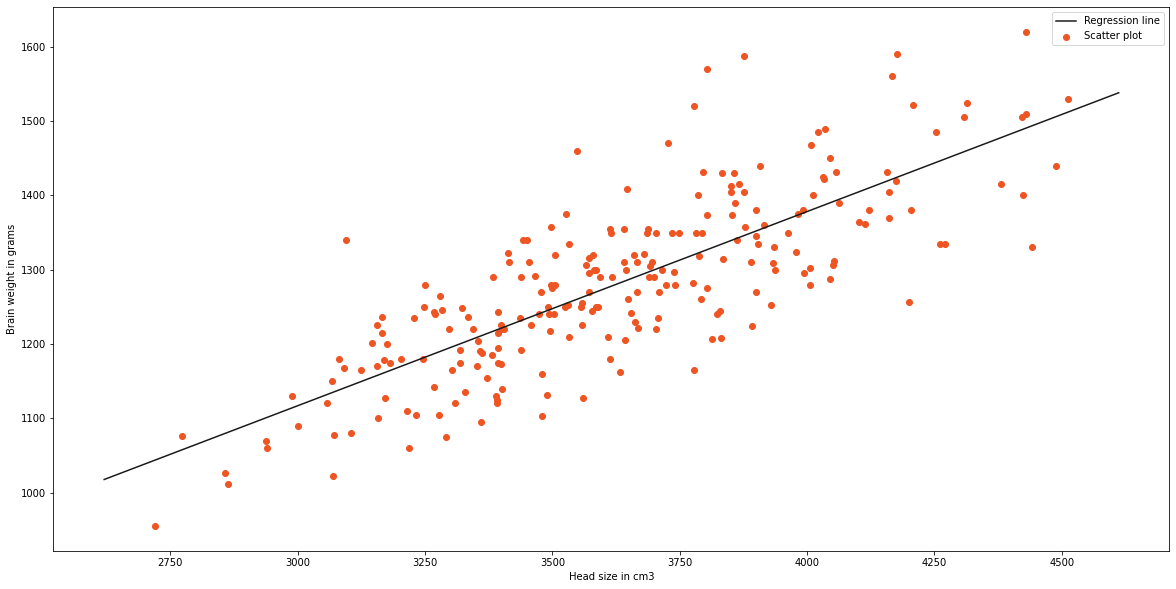

In [10]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# ploting line
plt.plot(x, y, color='#191919', label='Regression line')

# ploting scatter points
plt.scatter(X, Y, c='#ef5423', label='Scatter plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

### Calculating R^2 value

In [11]:
# calculating R-squared value
# R^2 is a measure of how close the data are to the fitted regression line
numinator_y = 0
denominator_y = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    denominator_y += (Y[i] - mean_y) ** 2
    numinator_y += (y_pred - mean_y) ** 2
R2 = 1 - (numinator_y / denominator_y)
print('R^2 = {}'.format(R2))

R^2 = 0.37322376666942514
